In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm



In [3]:
migration_data = pd.read_csv('../resources/newnationalmigration_clean.csv')
crime_data = pd.read_csv('../resources/TotalCrimeCanada.csv')
migration_data = migration_data[(migration_data['Date'] >= 1962) & (migration_data['Date'] <= 2000)]
migration_data.head()

,Date,National Net Migration
16,1962,-2154
17,1963,9588
18,1964,20176
19,1965,41451
20,1966,103254


In [4]:
crime_data.head()

,REF_DATE,VALUE
0,1962,796675
264,1963,874572
528,1964,960917
792,1965,989451
1056,1966,1094889


In [32]:

#axes.set(title = 'Net National Migration and Total Crime in Canada', xlabel = 'Net National Migration', ylabel  = 'Total Crime Incidences Canada')

In [5]:
crime_slope,crime_int,crime_r, crime_p, crime_std_err = stats.linregress(
    migration_data['National Net Migration'], crime_data['VALUE'])
crime_fit = crime_slope * migration_data['National Net Migration'] + crime_int

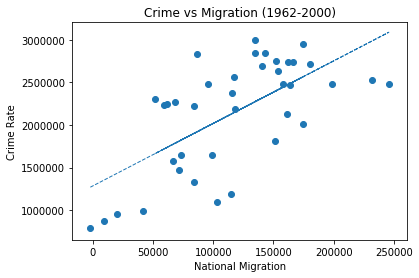

0.6538738060134346
6.363344798217691e-06
1.3940188241028293


In [9]:
plt.plot(migration_data['National Net Migration'], crime_fit, linestyle= "--", linewidth=1)
plt.scatter(migration_data['National Net Migration'], crime_data['VALUE'])

plt.title("Crime vs Migration (1962-2000)")
plt.xlabel("National Migration")
plt.ylabel("Crime Rate")
plt.savefig("CrimevsMigration.png")
plt.show()

print(crime_r)
print(crime_p)
print(crime_std_err)

In [ ]:
#We find a good p-value and standard error for Crime Rate vs Migration, but a poor r- value. There is some corelation between the two but the trend can be affected by other economic and societal factors as well.